In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("decisiontree.csv")
print(df)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [3]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
z=df.isna()
print(z)

   Position  Level  Salary
0     False  False   False
1     False  False   False
2     False  False   False
3     False  False   False
4     False  False   False
5     False  False   False
6     False  False   False
7     False  False   False
8     False  False   False
9     False  False   False


In [44]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=.25,random_state=0)

In [45]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_tr= st_x.fit_transform(x_tr)    
x_te= st_x.transform(x_te)   

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeRegressor()
dt.fit(x,y)

DecisionTreeRegressor()

In [47]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_tr, y_tr)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [48]:
y_pred= classifier.predict(x_te)  
print(y_pred)

[  50000 1000000  150000]


In [49]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_te, y_pred)  

In [50]:
print(cm)

[[0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]]


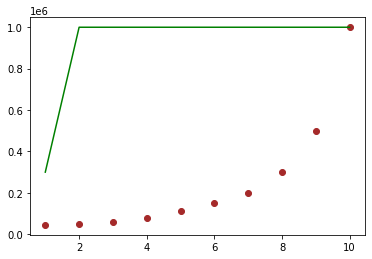

In [51]:
plt.scatter(x,y,color="brown")
plt.plot(x,classifier.predict(x),c="green")
plt.show()

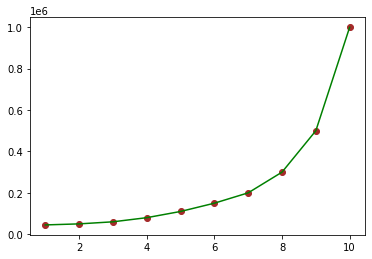

In [52]:
plt.scatter(x,y,color="brown")
plt.plot(x,dt.predict(x),c="green")
plt.show()